<a href="https://colab.research.google.com/github/miltonjq/MODELO-DE-PREDICCI-N-DE-PRECIOS-DE-CARROS-USADOS/blob/main/MODELO_DE_PREDICCI%C3%93N_DE_PRECIOS_DE_CARROS_USADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELO DE PREDICCIÓN DE PRECIOS DE CARROS USADOS

#Practica de laboratorio sobre Regresión Lineal Multivariable

In [ ]:
#Librerias que se esta usando para el laboratorio
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

#Analizamos nuestro Dataset

In [ ]:
# Aqui se mostrara todo el dataset
# Por lo cual tiene 8128 Filas × 13 columnas
dataset = pd.read_csv('cars_dataset.csv')
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
# Aqui se presenta y se da a conocer la cantidad de registros, los tipos de 
# atributos y clases existentes en el conjunto de datos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#Eliminar los NaN del Dataset

In [ ]:
# isna() devuelve DataFrame cuyas entradas contienen valores booleanos 
# que denotan la presencia de valores NaN en DataFrame
dataset.isna().sum().sort_values()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
max_power        215
mileage          221
engine           221
seats            221
torque           222
dtype: int64

In [ ]:
# EliminaNdo los valores vacios del NaN
dataset = dataset. dropna() 

In [ ]:
# isna() devuelve DataFrame cuyas entradas contienen valores booleanos 
# que denotan la presencia de valores NaN en DataFrame
dataset.isna().sum().sort_values()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

#Convertimos los tipo objeto a tipo entero

In [ ]:
# Aqui hacemos la limpieza de nuestro dataset con la Libreria LabelEncoder
# Columnas que son tipo objeto a convertir a tipo entero
labelencoder = LabelEncoder()
c = [0,4,5,6,7,8,9,10,11]
for i in c:
  dataset.iloc[:, i] = labelencoder.fit_transform(dataset.iloc[:,i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   int64  
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int64  
 5   seller_type    7906 non-null   int64  
 6   transmission   7906 non-null   int64  
 7   owner          7906 non-null   int64  
 8   mileage        7906 non-null   int64  
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   int64  
 11  torque         7906 non-null   int64  
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 864.7 KB


In [ ]:
# Mostramos el Dadaset en tipo entero
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1249,2014,450000,145500,1,1,1,0,335,13,242,178,5.0
1,1546,2014,370000,120000,1,1,1,2,284,36,13,260,5.0
2,375,2006,158000,140000,3,1,1,4,180,35,251,66,5.0
3,743,2010,225000,127000,1,1,1,0,327,24,295,224,5.0
4,1290,2007,130000,120000,3,1,1,0,136,14,286,21,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,733,2013,320000,110000,3,1,1,0,202,10,265,37,5.0
8124,618,2007,135000,119000,1,1,1,1,154,32,28,250,5.0
8125,1261,2009,382000,120000,1,1,1,0,222,13,239,178,5.0
8126,1633,2013,290000,25000,1,1,1,0,337,24,230,106,5.0


#Graficamos la relacion que existe en nuestras variables de entrada y salida

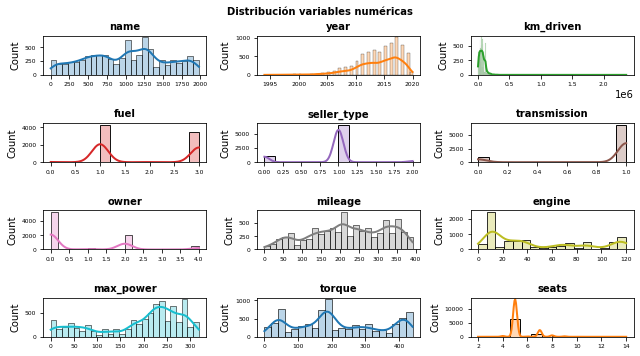

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('selling_price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dataset,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

#Ahora normalizamos nuestros datos

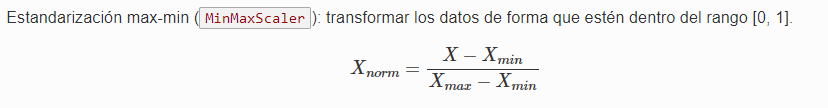

In [ ]:
# Como vemos algunos de nuestros valores son demasiados grandes 
# por ello lo escalaremos o nomralizamos.
dataset = (dataset - dataset.min())/(dataset.max() - dataset.min())
dataset.head(80)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0.630490,0.769231,0.042126,0.061640,0.333333,0.5,1.0,0.0,0.854592,0.108333,0.758621,0.404545,0.250000
1,0.780414,0.769231,0.034102,0.050837,0.333333,0.5,1.0,0.5,0.724490,0.300000,0.040752,0.590909,0.250000
2,0.189298,0.461538,0.012839,0.059310,1.000000,0.5,1.0,1.0,0.459184,0.291667,0.786834,0.150000,0.250000
3,0.375063,0.615385,0.019559,0.053803,0.333333,0.5,1.0,0.0,0.834184,0.200000,0.924765,0.509091,0.250000
4,0.651186,0.500000,0.010030,0.050837,1.000000,0.5,1.0,0.0,0.346939,0.116667,0.896552,0.047727,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.584048,0.692308,0.042126,0.050837,1.000000,0.5,1.0,0.5,0.336735,0.175000,0.946708,0.193182,0.416667
79,0.992933,0.730769,0.042126,0.072020,0.333333,0.5,1.0,0.0,0.663265,0.383333,0.043887,0.590909,0.250000
80,0.950025,0.846154,0.117352,0.059310,0.333333,0.5,1.0,0.0,0.125000,0.708333,0.009404,0.427273,0.500000
81,0.101464,0.807692,0.058175,0.038128,0.333333,0.5,1.0,0.0,0.823980,0.300000,0.971787,0.452273,0.250000


#Ahora crear sus variables 'X_train' e 'y_train'.

In [ ]:
# Una vez realizado la limpieza y purificacion de nuestro data, usaremos todos nuestros 
# registros como entrenamiento del modelo , no habra ninguna data-evaluacion
# identificamos nuestras x que son todas las columans menos selling_price
x_train = dataset.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]].values
y_train = dataset.iloc[:,2].values

In [ ]:
x_train.shape

(7906, 12)

In [ ]:
y_train.shape

(7906,)

#Modelo de Regresión Lineal con múltiples variables

In [ ]:
# en forma vectorial
def predict(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (ndarray):  predicción
    """
    p = np.dot(x, w) + b  #paralelo   
    return p 

In [ ]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo
      b (scalar)       : parámetro b del modelo
      
    Returns:
      cost (scalar): costo
    """
    m = X.shape[0]

    cost = 0.0
    for i in range(0,m):
      f_wb_i = np.dot(X[i], w) + b
      cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
   
    return cost

In [ ]:
def compute_gradient(X, y, w, b): 
    """
    Calcula la gradiente para la regresión lineal
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo 
      b (scalar)       : parámetro b del modelo
      
    Returns:
      dj_dw (ndarray (n,)): La gradiende del costo del parámetro w. 
      dj_db (scalar):       La gradiende del costo del parámetro b. 
    """   
    y_pred = predict(X, w, b)
    dj_dw = []
    
    for i in range(X.shape[1]):
      p = (y_pred - y) * [X[j][i] for j in range(len(y))]
      dj_dw.append(p.sum()/ len(y))

    dj_db = ((y_pred - y).sum())/ len(y)  
    return dj_db, dj_dw

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
   Realiza descenso de gradiente por lotes para aprender w y b. Actualiza w y b tomando num_iters pasos de gradiente con tasa de aprendizaje alfa
    
    Args:
      X (ndarray (m,n))   : Data, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : valor inicial del parámetro w
      b_in (scalar)       : valor inicial del parámetro b
      cost_function       : función costo
      gradient_function   : función que calcula la gradiente
      alpha (float)       : tasa de aprendizaje alfa
      num_iters (int)     : número de iteraciones para retornar la gradiente por descenso
      
    Returns:
      w (ndarray (n,)) : valor final del parámetro w
      b (scalar)       : valor final del parámetro b
      """
    
    # Un array que almacena el costo J y los pesos w's de cada iteración para graficar
    J_history = []

    while num_iters != 0:

      #nuevos valores de w y b
      b , w = compute_gradient(X, y, w_in, b_in)
      # actualizacion
      
      for i in range(len(w)):
        w_in[i] = w_in[i] - (alpha *(w[i]))

      b_in = b_in - (alpha *(b))

      #almacenamos el costo de esa prediccion con w y b
      J_history.append(compute_cost(X,y,w_in,b_in))

      num_iters = num_iters - 1 

    return w_in, b_in, J_history #retorna los valores finales de  w,b y historial de J para plotear

In [ ]:
initial_w = np.zeros_like(x_train[0])
initial_b = 0.

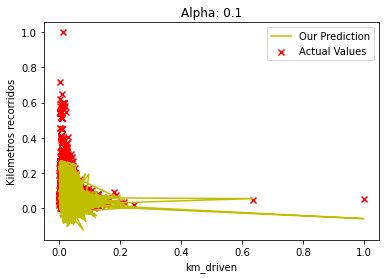

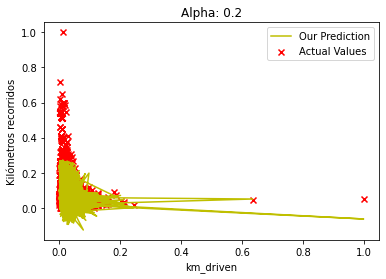

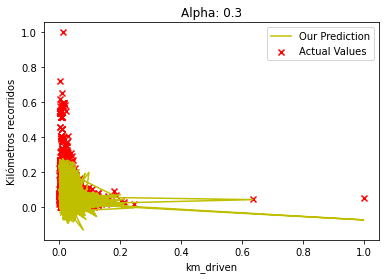

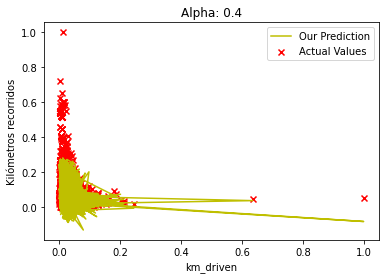

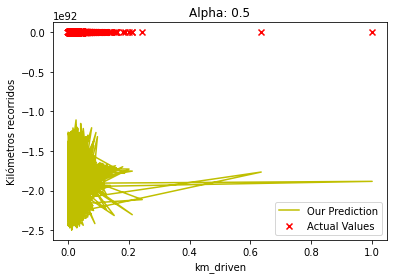

In [ ]:
# Escoger el mejor alpha
alphas = [0.1 , 0.2 , 0.3 , 0.4 , 0.5]
for alpha in alphas:
  # configuración de parámetros para el algoritmo de la gradiente por descenso
  iterations = 1000
  # ejecutar el algoritmo de la gradiente descendiente
  w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)

  # prediccion con el w optimo
  tmp_f_wb = predict(x_train, w_final, b_final)

  # Plot our model prediction
  plt.plot(x_train[:,[2]], tmp_f_wb, c='y',label='Our Prediction')

  # Plot the data points
  plt.scatter(x_train[:,[2]], y_train, marker='x', c='r',label='Actual Values')

  # Set the title
  plt.title("Alpha: " + str(alpha))
  # Set the y-axis label
  plt.ylabel('Kilómetros recorridos')
  # Set the x-axis label
  plt.xlabel('km_driven')
  plt.legend()
  plt.show()

In [ ]:
#Calcula y muestra la gradiente
initial_w = np.zeros_like(x_train[0])
initial_b = 0.
iterations = 1000
alpha = 0.2
# ejecutar el algoritmo de la gradiente descendiente
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)

#Ploteando el modelo

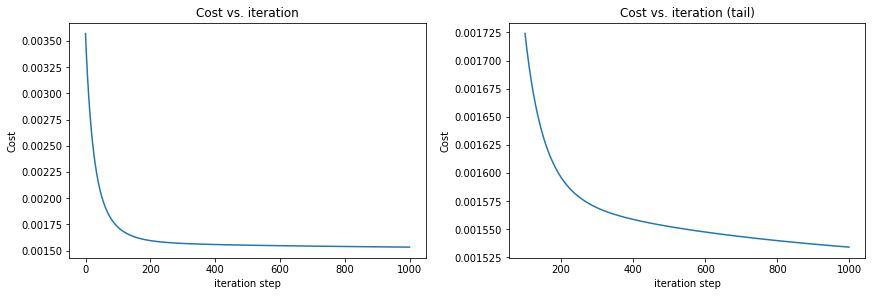

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

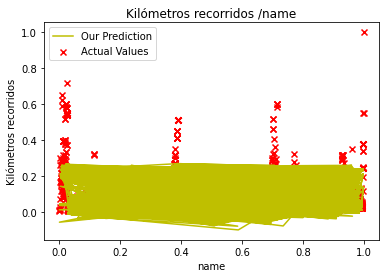

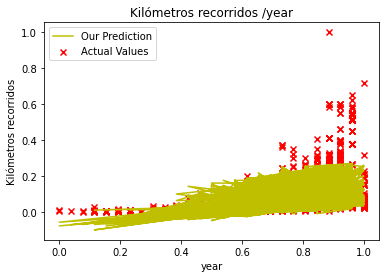

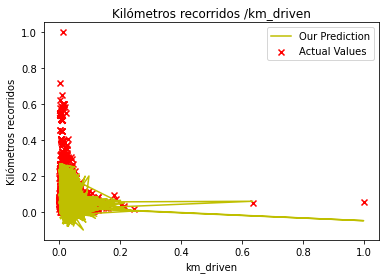

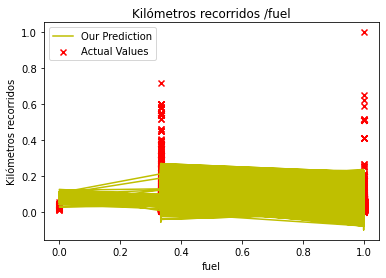

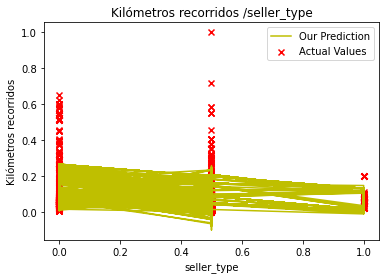

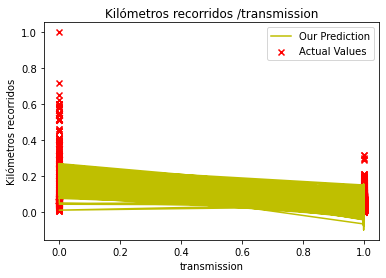

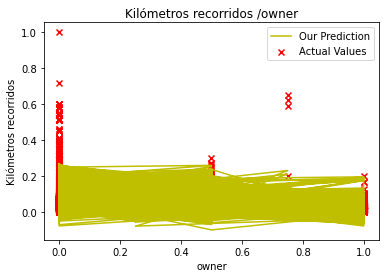

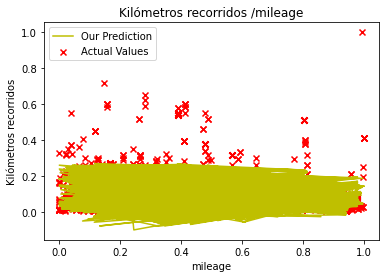

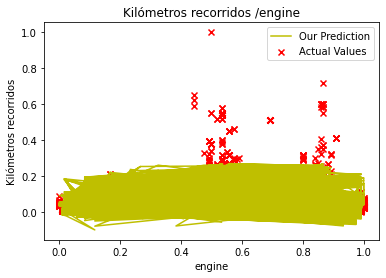

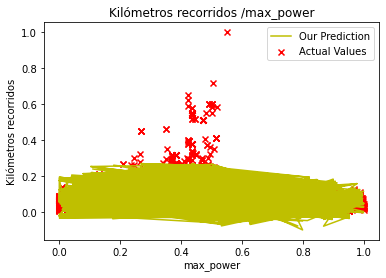

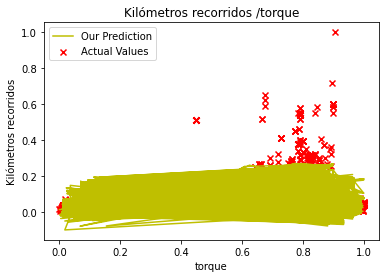

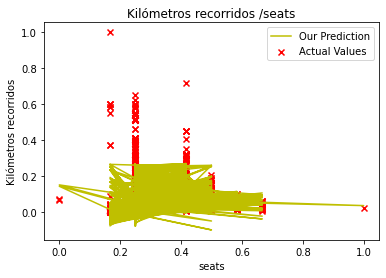

In [ ]:
columns_names = dataset.columns.values
columns_names=np.delete(columns_names,2)
for i in range(12):
  # prediccion con el w optimo
  tmp_f_wb = predict(x_train,w_final,b_final)

  # Plot our model prediction
  plt.plot(x_train[:,[i]], tmp_f_wb, c='y',label='Our Prediction')

  # Plot the data points
  plt.scatter(x_train[:,[i]], y_train, marker='x', c='r',label='Actual Values')

  # Set the title
  plt.title("Kilómetros recorridos /" + str(columns_names[i]))
  # Set the y-axis label
  plt.ylabel('Kilómetros recorridos')
  # Set the x-axis label
  plt.xlabel(str(columns_names[i]))
  plt.legend()
  plt.show()